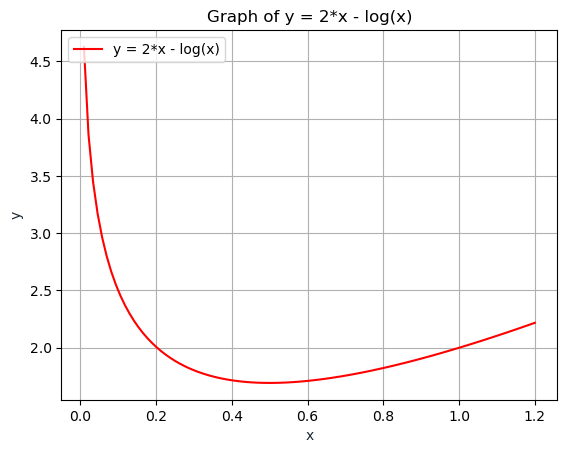

2 - 1/x
x**(-2)
2.50258509299405
0.18000000000000002
2.07479842809193
0.2952
1.81050218625582
log(2) + 1


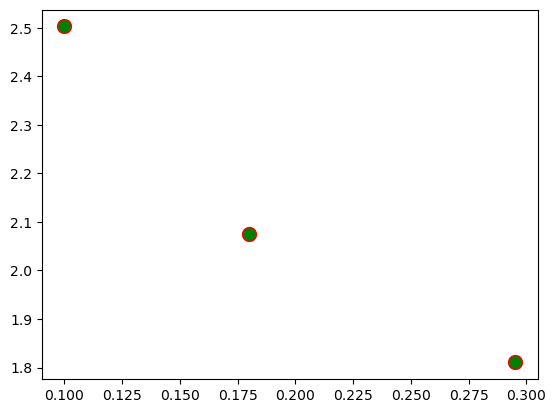

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import diff, ln, symbols
from sympy.calculus.util import Interval, minimum

x_symbol = symbols('x')

x_vals = np.linspace(0.01, 1.2, 100)  # Avoiding zero to prevent log(0) error
y_vals = 2*x_vals - np.log(x_vals)
plt.plot(x_vals, y_vals, '-r', label='y = 2*x - log(x)')
plt.title('Graph of y = 2*x - log(x)')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

f = 2*x_symbol - ln(x_symbol)
df = diff(f, x_symbol)
ddf = diff(df, x_symbol)
print(df)  # 2 - 1/x
print(ddf) # x**(-2)

x0 = 0.1
fx0 = 2*x0 - ln(x0)
print(fx0) # 2.50258509299405
x1 = x0 - (2 - 1/x0) / x0**(-2)
print(x1) # 0.18000000000000002
fx1 = 2*x1 - ln(x1)
print(fx1) # 2.07479842809193
x2 = x1 - (2 - 1/x1) / x1**(-2)
print(x2) # 0.2952
fx2 = 2*x2 - ln(x2)
print(fx2) # 1.81050218625582

print(minimum(2*x_symbol - ln(x_symbol), x_symbol, Interval(0, 1)))

x_list = [x0, x1, x2]
fx_list = [fx0, fx1, fx2]
for x_val, fx_val in zip(x_list, fx_list):
    plt.plot(x_val, fx_val, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.show()


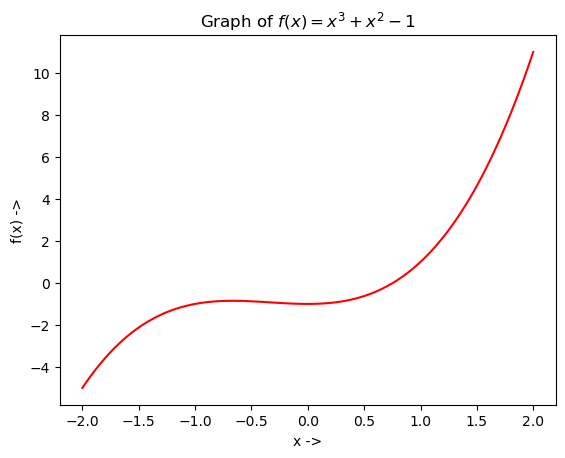

0.0
6.5
      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 6
           root: 0.7548776662468297


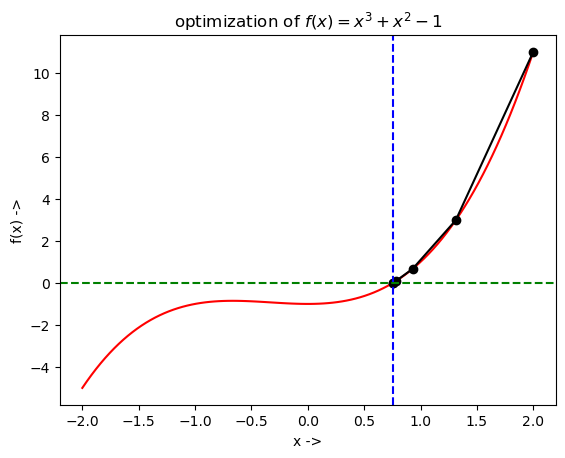

In [19]:
import matplotlib.pyplot as plt 
import numpy as np 
from numpy import log
from autograd import grad, hessian

def f(x): # objective function 
    return x**3 + x**2 -1 

l = np.linspace(-2, 2, 100)
plt.plot(l, f(l), 'r-')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Graph of $f(x) = x^3 + x^2 - 1$")
plt.show()
fprime = grad(f) # first derivative of f(x)
fprime2 = grad(fprime) # second derivative of f(x)
print(fprime(0.0)) # first derivative of f(x) at point x=0
## 0.0
print(fprime2(0.75)) # second derivative of f(x) at point 0.75
## 6.5
from scipy import optimize
x_values = []
f_values = []
def FP(x): # Returns the objective function, its first and second derivative at the point x 
    x_values.append(x)
    f_values.append(f(x))
    return f(x), fprime(x), fprime2(x)

sol = optimize.root_scalar(FP, x0=2., fprime=True, fprime2=True, xtol=10**-6, method='newton')
# The solver code, using the method = 'newton'
print(sol) # Prints the result
plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
plt.plot(x_values, f_values, 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("optimization of $f(x) = x^3 + x^2 - 1$")
plt.show()

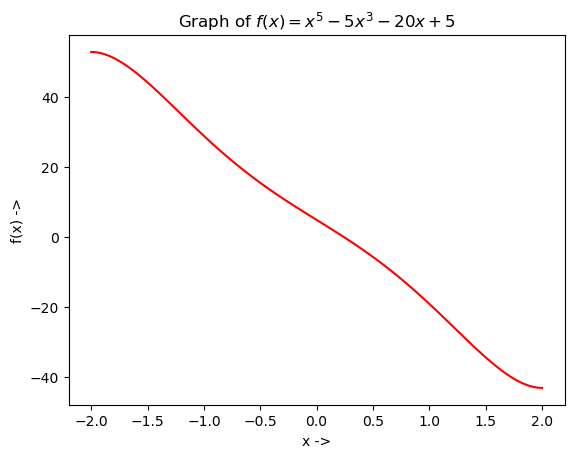

-20.1495
-2.98
      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 5
           root: 0.24630952872855558


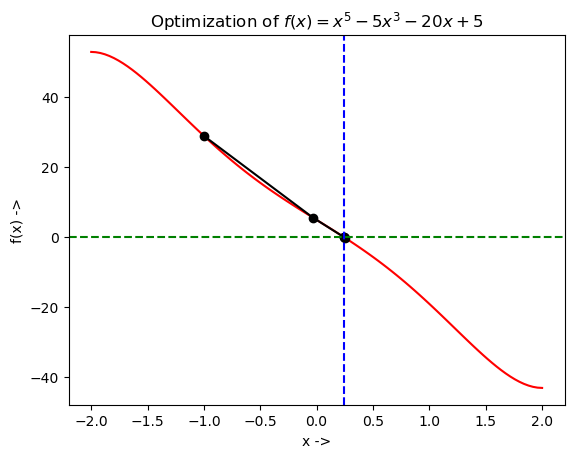

Optimal value of x: -2.0000001030182517
Optimal value of the objective function: 52.999999999999474


In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
from autograd import grad, hessian
from scipy import optimize

def f(x): 
    return x**5 - 5*x**3 - 20*x + 5  

l = np.linspace(-2, 2, 100)
plt.plot(l, f(l), 'r-')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Graph of $f(x) = x^5 - 5x^3 - 20x + 5$")
plt.show()

fprime = grad(f) 
fprime2 = grad(fprime) 

print(fprime(0.1)) 
print(fprime2(0.1)) 

x_values = []
f_values = []

def FP(x): 
    x_values.append(x)
    f_values.append(f(x))
    return f(x), fprime(x), fprime2(x)

sol = optimize.root_scalar(FP, x0=-1., fprime=True, fprime2=True, xtol=10**-6, method='newton')
print(sol)

plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
plt.plot(x_values, f_values, 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Optimization of $f(x) = x^5 - 5x^3 - 20x + 5$")
plt.show()

threshold = 0.015
x = 0.1
while True:
    derivative = fprime(x)
    if abs(derivative) < threshold:
        break
    x -= derivative / hessian(f)(x)
optimal_value = f(x)
print("Optimal value of x:", x)
print("Optimal value of the objective function:", optimal_value)

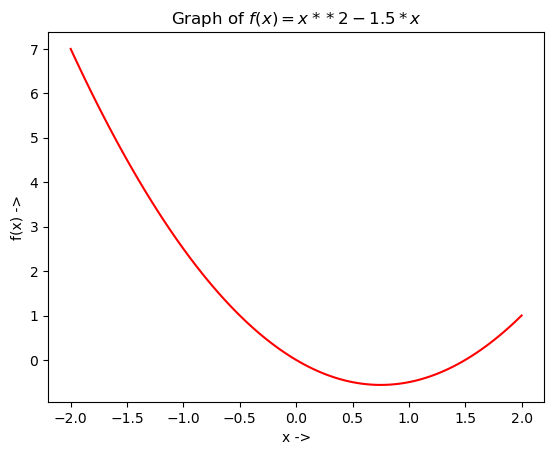

-1.3
2.0
      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 4
           root: -6.887200905886952e-19


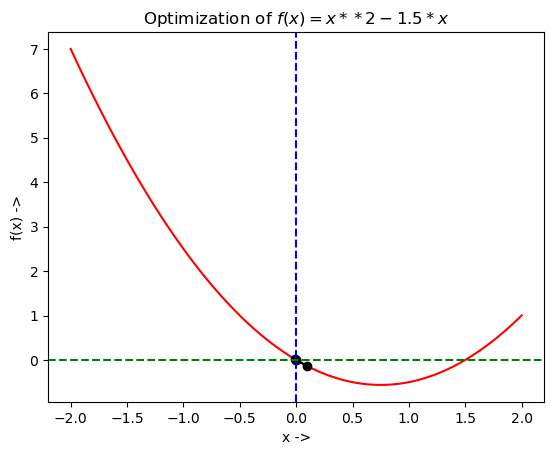

Optimal value of x: 0.75
Optimal value of the objective function: -0.5625


In [9]:
import matplotlib.pyplot as plt 
import numpy as np 
from autograd import grad, hessian
from scipy import optimize

def f(x): 
    return x**2 -1.5*x

l = np.linspace(-2, 2, 100)
plt.plot(l, f(l), 'r-')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Graph of $f(x) = x**2 -1.5*x$")
plt.show()

fprime = grad(f) 
fprime2 = grad(fprime) 

print(fprime(0.1)) 
print(fprime2(0.1)) 

x_values = []
f_values = []

def FP(x): 
    x_values.append(x)
    f_values.append(f(x))
    return f(x), fprime(x), fprime2(x)

sol = optimize.root_scalar(FP, x0=0.1, fprime=True, fprime2=True, xtol=10**-6, method='newton')
print(sol)

plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
plt.plot(x_values, f_values, 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Optimization of $f(x) = x**2 -1.5*x$")
plt.show()

threshold = 0.015
x = 0.1
while True:
    derivative = fprime(x)
    if abs(derivative) < threshold:
        break
    x -= derivative / hessian(f)(x)
optimal_value = f(x)
print("Optimal value of x:", x)
print("Optimal value of the objective function:", optimal_value)

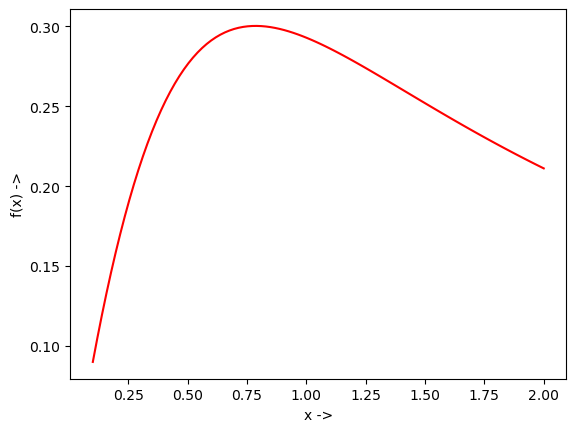

0.8019777472948437
-1.9411077428858723
      converged: True
           flag: 'converged'
 function_calls: 4
     iterations: 4
           root: -4.957803252072648e-16


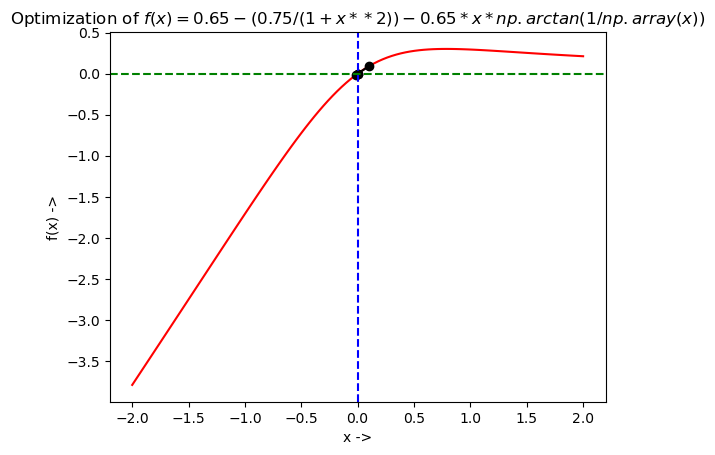

Optimal value of x: 0.7750678986806501
Optimal value of the objective function: 0.30025727881050424


In [32]:
import matplotlib.pyplot as plt 
import numpy as np 
from autograd import grad, hessian
from scipy import optimize
import autograd.numpy as anp

def f(x):
    return 0.5 / anp.sqrt(1+x**2) - anp.sqrt(1+x**2) * (1 - (0.5/(1+x**2))) + x

l = np.linspace(0.1, 2, 100)
plt.plot(l, f(l), 'r-')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.show()

fprime = grad(f) 
fprime2 = grad(fprime) 

print(fprime(0.1))
print(fprime2(0.1))

x_values = []
f_values = []

def FP(x): 
    x_values.append(x)
    f_values.append(f(x))
    return f(x), fprime(x), fprime2(x)

sol = optimize.root_scalar(FP, x0=0.1, fprime=True, fprime2=True, xtol=10**-6, method='newton')
print(sol)

plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
plt.plot(x_values, f_values, 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Optimization of $f(x) = 0.65 - (0.75/ (1 + x**2)) -0.65*x* np.arctan(1 / np.array(x))$")
plt.show()

threshold = 0.015
x = 0.1
while True:
    derivative = fprime(x)
    if abs(derivative) < threshold:
        break
    x -= derivative / hessian(f)(x)
optimal_value = f(x)
print("Optimal value of x:", x)
print("Optimal value of the objective function:", optimal_value)
